In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 4)

- 基于我们的轮廓系数来选择最佳的n_clusters
- 知道每个聚出来的类的轮廓系数是多少，还想要一个各个类之间的轮廓系数的对比 ax1
- 知道聚类完毕后的图像分布是什么 ax2
 
> 第一个图死我们轮廓系数图像，是由各个簇的轮廓系数组成的横向条形图 

> 横向条形图的横坐标是我们的轮廓系数取值，纵坐标是我们的每个样本，因为轮廓系数系数对于每一个样本进行计算的

For n_clusters = 2 	The average silhouette_score is : 0.6810369058925005
For n_clusters = 3 	The average silhouette_score is : 0.7374787697264237
For n_clusters = 4 	The average silhouette_score is : 0.6357722725081977
For n_clusters = 5 	The average silhouette_score is : 0.5234639125486958
For n_clusters = 6 	The average silhouette_score is : 0.4586056257560756
For n_clusters = 7 	The average silhouette_score is : 0.4307036580222455


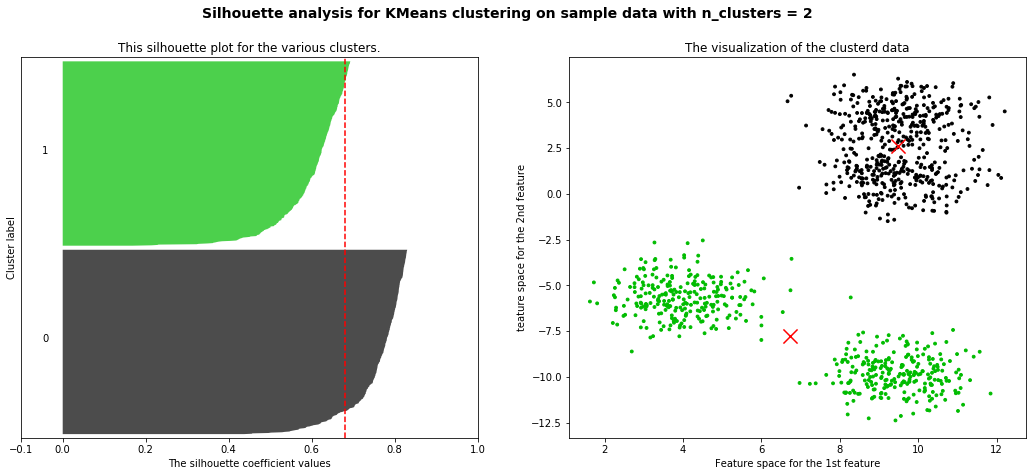

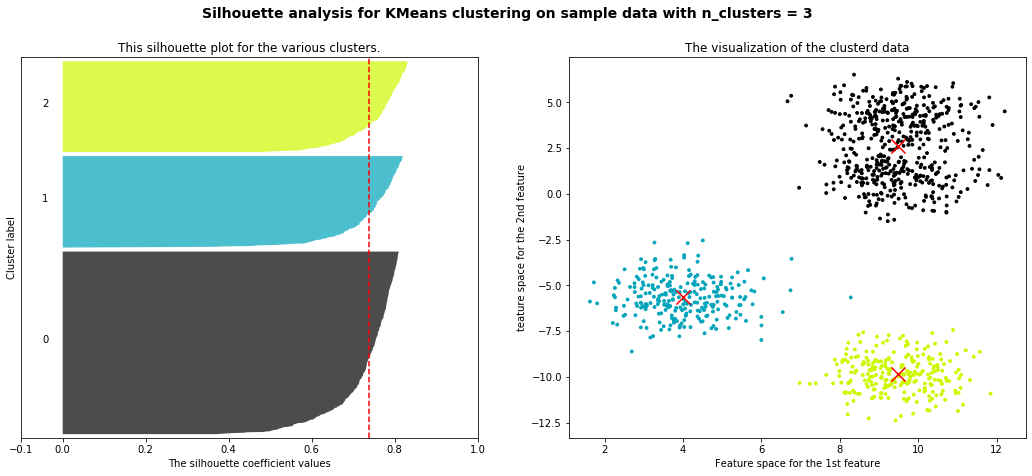

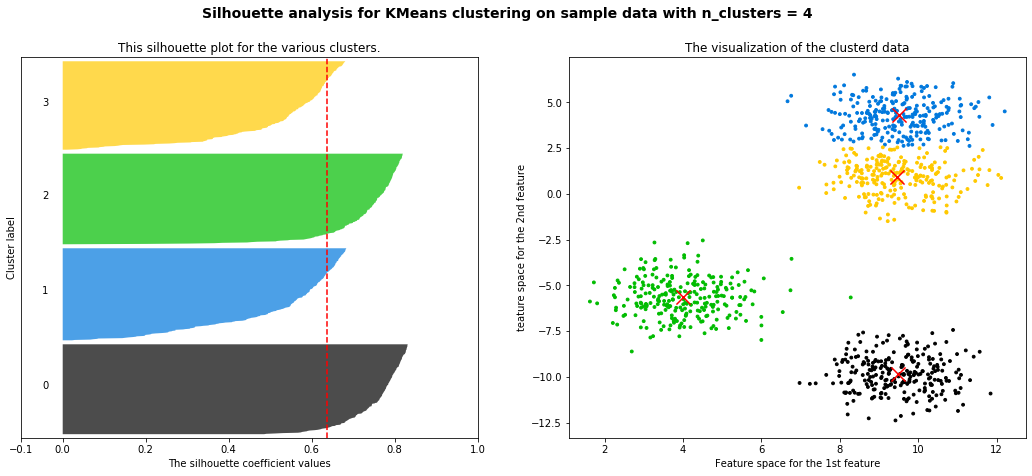

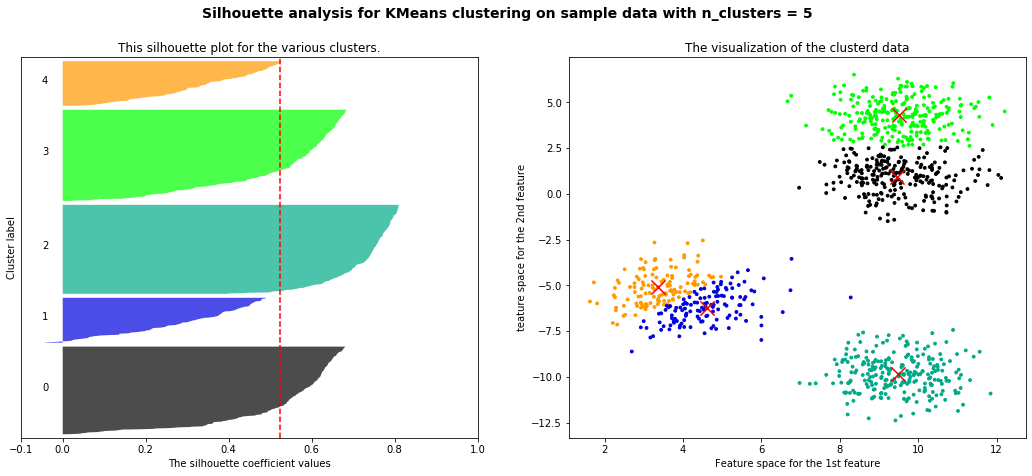

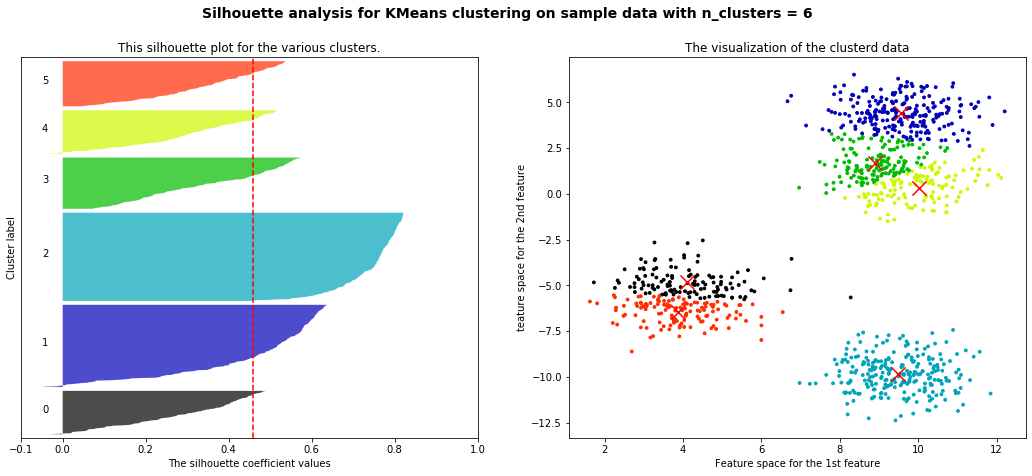

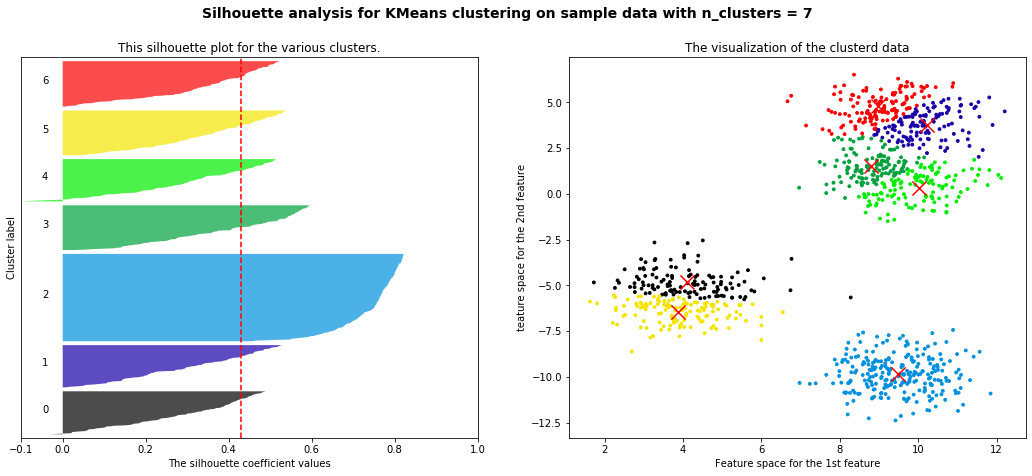

In [11]:
for n_clusters in [2,3,4,5,6,7]:
    # 设定我们想要分成的簇树
    n_clusters = n_clusters
    # 创建一个画布，（1，2）：1行2列
    fig,(ax1,ax2) = plt.subplots(1,2)
    # 设定画布的尺寸（英尺）
    fig.set_size_inches(18,7)
    # 轮廓系数的取值在【-1，1】之间，但我们至少希望轮廓系数的大于0的，太长的横坐标不利于进行可视化的，所以设定在【-0.1，1】之间
    ax1.set_xlim([-0.1,1])
    # 接下来设定纵坐标，通常来说，纵坐标是从0开始的，最大值取到x.shape【0】的取值
    # 但是希望，每个簇能够排在一起，不同的簇之间能够有一定的空隙
    # 因此我们在设定纵坐标的取值范围的时候，在x.shape[0],加上一个距离(n_clusters+1)*10,留作间隔用
    ax1.set_ylim([0,x.shape[0]+(n_clusters +1)*10])
    
    # 开始建模，调用聚类好的标签
    clusterer = KMeans(n_clusters = n_clusters,random_state = 10).fit(x)
    cluster_labels = clusterer.labels_
    
    # 调用轮廓系数，注意，silhouette_score生成的是所有样本点的轮廓系数均值
    # 两个需要输入的参数是，特征矩阵X和聚类完毕后的标签
    silhouette_avg = silhouette_score(x,cluster_labels)
    print("For n_clusters =",n_clusters,"\tThe average silhouette_score is :",silhouette_avg)
    
    # 调用silhouette_samples，返回每个样本点的轮廓系数，就是我们的横坐标
    sample_silhouette_values = silhouette_samples(x,cluster_labels)
    
    # 设定y轴上的初识取值
    y_lower = 10
    
    # 接下来，对每一个簇进行循环
    for i in range (n_clusters):
        # 从每个样本的轮廓系数结果中抽取第i个簇的轮廓系数，并对他进行排序
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # 注意，.sort()这个命令会去直接改掉原数据的顺序
        ith_cluster_silhouette_values.sort()
        
        # 查看这一个簇中究竟有多少的样本
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        # 这个簇在y轴上的取值，应该是由初始值（y_lower）开始，到初始值+加上这个簇中的样本数量结束（y_upper）
        y_upper = y_lower + size_cluster_i
        
        
        # colormap库中的，使用小数来调用颜色的函数
        # 在nipy_spectral（【输入任意小数来代表一个颜色】）
        # 希望每个簇的颜色是不一致的，我们需要的颜色种类刚好是循环的个数的种类
        # 在这里只要能够确保，每次循环生成的小数是不同的，可以使用任何方式来获取小数
        # 以确保多有的簇会有不同的颜色
        color = cm.nipy_spectral(float(i)/n_clusters)
        
        # 开始填充子图1中的内容
        # fill_between是让一个范围中的柱状图都统一颜色的函数
        # fill_betweenx 的范围是在纵坐标上
        # fill_betweeny 的范围在横坐标上
        # fill_betweenx的参数应该输入（纵坐标的下限，纵坐标的上限，x轴上的取值，柱状图的颜色）
        ax1.fill_betweenx(np.arange(y_lower,y_upper),
                           ith_cluster_silhouette_values,
                           facecolor = color,
                           alpha = 0.7)
        
        # 为每个簇的轮廓系数写上簇的编号，并且让簇的编号显示坐标轴上每个条形图的中间位置
        # text的参数为（要显示编号的位置的横坐标，纵坐标，显示的内容）
        ax1.text(-0.05,y_lower+ 0.5*size_cluster_i,str(i))
        
        # 为下一簇计算新的y轴上的初始值，是每一次迭代之后，y的上限在加上10，
        # 以此来保证，不同的簇的图像之间显示由空隙
        y_lower = y_upper +10
    
    # 给图1 加上标题，横纵坐标轴，的标签
    ax1.set_title("This silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # 把整个数据集上的轮廓系数的均值以虚线的形式放入我们的图中axvline-->专门用来对子图进行划线
    ax1.axvline(x = silhouette_avg,color = 'red',linestyle = '--')
    # 让y轴不显示刻度
    ax1.set_yticks([])
    # 让x轴上的刻度显示我们规定的列表
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    
    # 开始对第二个图进行处理，首先获取新颜色，由于这里没有循环，因此我们需要一次性生成多个小数来获取多个颜色
    colors  = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(x[:,0],x[:,1],
               marker = 'o',
                s =8,
                c = colors
               )
    # 把生成的质心放到图像中去
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:,0],centers[:,1],marker = 'x',c = 'red',alpha = 1,s =200)
    
    ax2.set_title("The visualization of the clusterd data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("teature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"%n_clusters),
                fontsize = 14,fontweight = 'bold')